In [9]:
STOCKS=['AMZN','AAPL','AMGN','ATVI',
        'BIIB','BIDU',
        'CMCSA','CSCO','CELG','COST','CHK',
        'DIS',
        'EBAY','ESRX',
        'FOX','FB',
        'GE','GOOG','GOOGL','GILD',
        'INTC',
        'KHC','KO',
        'MSFT','MNST','MRK','MCD',
        'NFLX',
        'ORLY',
        'PG','PFE','PYPL',
        'QCOM',
        'REGN',
        'SBUX',
        'T','TSLA',
        'VIAB',
        'WBA'
        ]

In [54]:
STOCKS=['FB',]

/home/robertb/vpy35/lib/python3.5/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/robertb/vpy35/lib/python3.5/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/robertb/vpy35/lib/python3.5/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data h

FB  prediction for period after week ending  2016-08-14 00:00:00  is :  [ 1.]
FB
-0.44


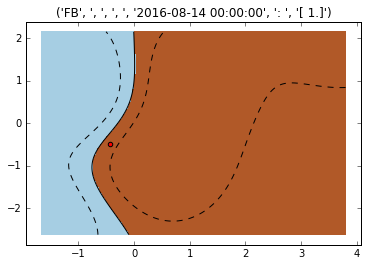

In [71]:
import quandl
from sklearn_pandas import DataFrameMapper, cross_val_score
import sklearn.preprocessing, sklearn.decomposition, sklearn.linear_model, sklearn.pipeline, sklearn.metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC,LinearSVR
from pylab import savefig
%matplotlib inline

quandl.ApiConfig.api_key = 'Xq3mura9xjsuVKspqT7N'
quandl.ApiConfig.api_version = '2015-04-09'

for s in STOCKS:
    SYMBOLNAME=s
    data=quandl.get("WIKI/"+SYMBOLNAME,start_date="2016-01-01",end_date="2016-12-31",transformation="diff",collapse="weekly")
    #data.describe()
    data.ix[data.Close<0,'Momentum']=0
    data.ix[data.Close>0,'Momentum']=1

    data.ix[(data.High<0) & (data.Volume<0),'Sector']='b'
    data.ix[(data.High>0) & (data.Volume<0),'Sector']='g'
    data.ix[(data.High<0) & (data.Volume>0), 'Sector']='r'
    data.ix[(data.High>0) & (data.Volume>0), 'Sector']='c'
    mapperX=DataFrameMapper([('High',sklearn.preprocessing.StandardScaler()),
                        ('Volume',sklearn.preprocessing.StandardScaler())])
    mapperY=DataFrameMapper([('Close',sklearn.preprocessing.Binarizer())])
    #mapperZ=DataFrameMapper([('Sector', None )])
    prediction=''
    X=np.round(mapperX.fit_transform(data.copy()), 2)
    Y=np.round(mapperY.fit_transform(data.copy()), 1)
    #ZZ=np.round(mapperZ.fit_transform(data.copy()), 1)
    #ZZ=mapperZ
    
    lastX=X[-1][0]
    lastY=X[-1][1]
    try:
        Y=Y.reshape(-1,1)
        clf=SVC()
        #clf=LinearSVR()
        X=np.array(X)
        Y=np.array(Y)
        clf.fit(X,Y)
        dates_ = data.index.tolist()
        prediction=str(clf.predict(X[-1]))
        print(SYMBOLNAME," prediction for period after week ending ", str(dates_[-1])," is : ",clf.predict(X[-1]))
    except ValueError as e:
        print("ValueError! No model made for ",s," but graphs still exist.",e.args[0])
        print("X: ",X)
        print("Y: ",Y)
        continue
    
    
    data['Momentum'][data.index[-1]]=0.5
    data['Momentum'][data.index[-1]]
    print(SYMBOLNAME)
    
    
    plt.figure(SYMBOLNAME)
    plt.clf()
    
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    an_string=SYMBOLNAME,', ',', ',str(dates_[-1]),': ',prediction
    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0,cmap=plt.cm.Paired)
    
    #plt.scatter(x=XX,y=YY,label=s)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])
    #plt.scatter(XX,YY,c='black')
    plt.scatter(lastX,lastY,c='red')
    print(lastX)
    plt.title(an_string)
    plt.savefig('Images/'+SYMBOLNAME+'.png')
    
 #   clf.predict(X[-1])